<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/ZiyueNie_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Name__

__Rules__ 

- After finish, you should email to me PDF version with file name "firstname_lastname_midterm.pdf"
- Any kind of communications are strictly prohibited. But you can use book, note, or internet.
- All your answers shall be rigourously justified.
- No python modules shall be imported except those given below

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import fmin

__Problem__

We consider BSM model with the following parameters:

In [0]:
'''======parameters============='''
s0, r, sigma, T, K, otype = [30., .02, 0.3, 1., 31.0, 1] # spot, rate, vol, maturity, strike, option type

- (Q) Write for the european call the explicit pricing formula, then find call price.



<br>For European call option,
$$C_0 = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
where $d_i$ are given as
$$d_1 = \frac{(r + \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T},$$
and
$$d_2 = \frac{(r - \frac 1 2 \sigma^2) T - \ln \frac{K}{S_0}}{\sigma \sqrt T} = d_1 - \sigma \sqrt T$$


In [11]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm(s0, r, sigma, T, K, otype):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma ** 2) 
          * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    return (otype * s0 * norm.cdf(otype * d1) 
            - otype * np.exp(-r * T) * K * norm.cdf(otype * d2))
price=bsm(30, 0.02, 0.3, 1., 31.0, 1)

    
print('>>>> your answer below: ')
print(str(price))


>>>> your answer below: 
3.4102506629837706


- (Q) 
    - write Fourier transform $\phi$ of $\ln S_T$;
    - write down the call price in terms of $\phi$;
    - then find call price using the above formula.

**1.Fourier transform $\phi$ of $\ln S_T$**
<br>
Since $$S_T=S_0*e^{(r-0.5\sigma^2)t+\sigma W_t}$$,
$$\ln S_T=\ln S_0+(r-0.5\sigma^2)t+\sigma W_t$$
and since $W_T$ is a standard Brownian Motion, so we have $W_t\sim \mathcal N(0,t)$ , then

$$\phi(\ln S_T)=i\mu u-\frac{\sigma^2 u^2}{2}$$
<br>
**2.the call price in terms of $\phi$;**
$$
C = S_{0}I_{1} - Ke^{-rT}I_{2}
$$
where
$$
I_{1}=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty}Re(\frac{e^{-iu\log(K/S_0)}\phi(u-i)}{iu\phi(-i)})du=\frac{1}{2} + \frac{1}{\pi} \int_{0}^{\infty} \frac{\sin(d_{1}t)}{t}e^{-\frac{t^{2}}{2}}dt
$$

$$
I_{2}=\frac{1}{2} + \frac{1}{\pi}\int_{0}^{\infty}Re(\frac{e^{-iu\log(K/S_0)}\phi(u)}{iu})du=\frac{1}{2} + \frac{1}{\pi} \int_{0}^{\infty}\frac{\sin (d_{2}t)}{t}e^{-\frac{t^{2}}{2}}dt
$$
and
$$d_{1} = \frac{\log(\frac{S_{0}}{K}) + (r + \frac{\sigma^{2}}{2})T}{\sigma\sqrt{T}}$$

$$d_{2} = \frac{\log(\frac{S_0}{K})+(r-\frac{\sigma^{2}}{2})T}{\sigma \sqrt{T}}$$

In [19]:
'''========
Black-Scholes-Merton price by Fourier transform. 
=========='''

def bsm_fourier(s0, r, sigma, T, K, otype):
  d1=(np.log(s0/K)+((r+((sigma**2)/2))*T))/(sigma*np.sqrt(T))
  d2=(np.log(s0/K)+((r-((sigma**2)/2))*T))/(sigma*np.sqrt(T))
  I1=0.5+(1/np.pi)*quad(lambda t: ((np.sin(d1*t))/t)*np.exp(-(t**2)/2),0,np.inf)[0]
  I2=0.5+(1/np.pi)*quad(lambda t: ((np.sin(d2*t))/t)*np.exp(-(t**2)/2),0,np.inf)[0]
  C=(s0*I1)-(K*(np.exp(-r*T))*I2)
  return C

price_f=bsm_fourier(30, 0.02, 0.3, 1., 31.0, 1)
print('>>> your answer below ')
print(str(price_f))

>>> your answer below 
3.4102506629837706


- (Q) Prove that call price is increasing with respect to its maturity, and demonstrate your result numerically.

Since for european call price,
$$C_0 = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
<br> and
$$
\frac{\partial C_0}{\partial T}=S_0\phi(d_1)\frac{\partial d_1}{\partial T}-[-rKe^{-rT}\Phi(d_2)+Ke^{-rT}\phi(d_2)\frac{\partial d_2}{\partial T}]
$$
$$
 \frac{\partial C_0}{\partial T}= S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial d_1}{\partial T}-Ke^{-rT}\frac{e^{-\frac{d_2^2}{2}}}{\sqrt{2\pi}}\frac{\partial d_2}{\partial T}+rKe^{-rT}\Phi(d_2)
$$

$$
\frac{\partial C_0}{\partial T}= S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial d_1}{\partial T}-S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial d_2}{\partial T}+rKe^{-rT}\Phi(d_2)
$$
<br>
plug $d_2=d_1-\sigma \sqrt T$ in, we have
$$
\frac{\partial C_0}{\partial T}= S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial d_1}{\partial T}-S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial (d_1-\sigma \sqrt T)}{\partial T}+rKe^{-rT}\Phi(d_2)
$$
$$
\frac{\partial C_0}{\partial T}= S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\partial(\sigma\sqrt T)}{\partial T}+rKe^{-rT}\Phi(d_2)$$
$$
\frac{\partial C_0}{\partial T}= S_0\frac{e^{-\frac{d_1^2}{2}}}{\sqrt{2\pi}}\frac{\sigma}{2 \sqrt T}+rKe^{-rT}\Phi(d_2)>0$$
<br>
Therefore, for call option,  fix volatility, call price  increases as maturity increases.


- Let $\sigma = 30\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

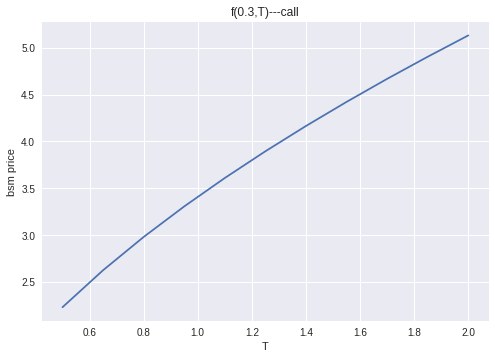

In [21]:
'''====your code here==='''


T=np.linspace(0.5,2,11)
p=bsm(30, 0.02, 0.3, T, 31.0, 1)
#option1=VanillaOption(otype=1, strike=110, maturity=T)
#gbm1=Gbm(init_state=100,drift_ratio = .0475,vol_ratio = .2)
plt.plot(T, p)
plt.xlabel('T')
plt.ylabel('bsm price')
plt.title('f(0.3,T)---call');

- (Q) 
Do you think that call price is also increasing with respect to its maturity for Heston model? Please justify your answer.

$$
C = S_{0}I_{1} - Ke^{-rT}I_{2}
$$

- (Q) With the same parameters for GBM above, price the arithmetic asian option with $T = 1$, $K= 31$, and two periods (i.e. average prices of three time instants)

In [34]:
'''====your code here==='''

def BM_gen(T1, T2, num):
    t=np.linspace(T1,T2,num+1)
    W=np.zeros(num+1)
    for i in range(num):
        W[i+1]=W[i]+np.sqrt((T2-T1)/num)*np.random.normal(0,1)
    return W, t
def S_price(w,t,s0,drift_ratio,vol_ratio):
        return s0*np.exp((drift_ratio-0.5*vol_ratio**2)*t+vol_ratio*w)
def bsm_arithmetic_asian_exact_sample(otype, strike, maturity, num_step, num_path,drift_ratio,vol_ratio,s0):
        W=[]
        S=[]
        Mean=[]
        for i in range(num_path):
            w, T=BM_gen(0, maturity, num_step)
            W.append(w)
        for w in W:
            S.append(S_price(w,T,s0,drift_ratio,vol_ratio))
        Means=np.array([np.mean(s) for s in S])-strike
        for mean in Means:
            Mean.append(max(mean,0)*np.exp(drift_ratio*maturity))
        Mean=sum(Mean)/num_path
        return Mean   
price_aao= bsm_arithmetic_asian_exact_sample(otype=1, strike=31, maturity=1, num_step=5, num_path=3,drift_ratio=0.02,vol_ratio=0.3,s0=30)
print(str(price_aao))

1.3263330728440559


__Problem__

We consider the call price underlying XYZ stock with spot price $\$30$ and interest rate $2\%$. Below is the current market call prices corresponding to its maturity $T=1$ and different strikes:

In [0]:
s0, r, T, otype = [30., .02, 1., 1] # spot, rate, maturity, option type
strike_arr = [28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0] # strike array
market_call_arr = [5.7, 5.0, 4.5, 4.1, 3.8, 3.6, 3.6, 3.7, 3.9] # corresponding market price

- (Q) Find their implied volatilities and draw its volatility smile

In [49]:
'''====your code here===='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      return np.max([0, (s - k)*otype])
class Sde_1d:
    def __init__(self, init_state=0., drift=lambda x:0, vol=lambda x:1, drift_ratio = .0475, vol_ratio = .2):
        self.init_state = init_state
        self.drift = drift
        self.vol = vol
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
class Gbm_1d(Sde_1d):
    def __int__(self, init_state = 100., drift_ratio = .0475, vol_ratio = .2):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.drift = lambda x: drift_ratio*x
        self.vol = lambda x: vol_ratio*x
    def bsm_price(self, vanilla_option):
        s0 = self.init_state
        sigma = self.vol_ratio
        r = self.drift_ratio
        otype = vanilla_option.otype
        k = vanilla_option.strike
        maturity = vanilla_option.maturity
        d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2)* maturity) / (sigma * np.sqrt(maturity))
        d2 = d1 - sigma * np.sqrt(maturity)
        return otype * s0 * norm.cdf(otype * d1)- otype * np.exp(-r * maturity) * k * norm.cdf(otype * d2) 
option_list = []

for i in range(len(strike_arr)):
    option1= VanillaOption(
      otype = 1,
     strike = strike_arr[i], 
      maturity = 1,
      market_price=market_call_arr[i] 
      )
    option_list.append(option1)
gbm1 = Gbm_1d(
    init_state = 30, #today's starbucks stock price
    drift_ratio =0.02, 
    vol_ratio = .1 #initial guess
)
'''================
define an error function
===================='''
def error_function(vol, gbm, option):
  gbm.vol_ratio = vol
  return np.abs(option.market_price - gbm.bsm_price(option))

'''==========
define a method to seek for an implied volatility
============'''

def implied_volatility(gbm, option):
  init_vol = .1 #initial guess
  return fmin(error_function, init_vol, args = (gbm, option), disp = 0)[0]
data3=[]
for i in range(len(market_call_arr)):
  a = implied_volatility(gbm1, option_list[i])
  data3.append(a)
print(data3) # implied volatility

[0.377968750000001, 0.3375390625000009, 0.3153125000000008, 0.3016796875000007, 0.29601562500000067, 0.2980468750000007, 0.3159375000000008, 0.34125000000000083, 0.37398437500000103]


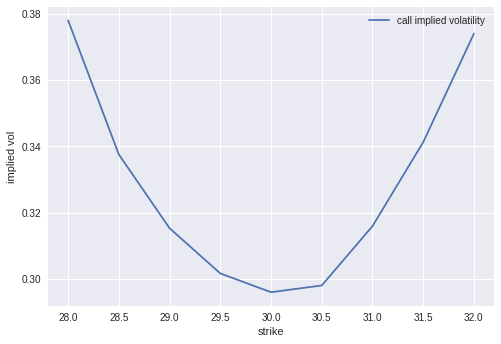

In [50]:

plt.plot(strike_arr,data3,label='call implied volatility')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend()

- (Q.) Find bsm calibrated volatility to the above data by minimizing $L^2$ norm in the error.

In [53]:
'''====your code here===='''
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  err1 = 0
  for i in np.arange(len(option_list)):
    err1 = err1 + ((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2    
  return err1
'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]
# Take options of 2-mon maturity
filter1 = list(filter(lambda x: x.maturity == 1, option_list))
calibrated_volatility1 = bsm_calibration(gbm1, filter1)
print('>>>>>>>> calibrated_volatility is ' + str(calibrated_volatility1))

>>>>>>>> calibrated_volatility is 0.3282031250000009


__Problem__

Let $f:\mathbb R\mapsto \mathbb R$ be a smooth even function 
satisfying $f(0) = 0$. 
Our objective is to approximate  the second order derivative $f''(0)$. 
- (Q.) Prove that $f'(0) = 0.$
- (Q.) Ziyue proposes the following estimator for $f''(0)$: for a step size $h$
 $$a_{h} = \frac{2f(h)}{h^{2}}.$$
 Please justify that Ziyue's estimation has its convergence $O(h^{2})$.
- (Q.) Is there anyway to improve the above 
 convergence to $O(h^{4})$ in the form of 
 $$b_{h} = \frac{c_{1} f(h) + c_{2}f(2h)}{h^{2}}$$
 for some constants $c_{1}$ and $c_{2}$?
- (Q.) If the above function $f$ is odd and other properties remain the same, how do you want to find the $f''(0)$ efficiently?


__Soln__ (your latex input here)



__Problem__

Thomas proposed the following estimator for the value $\pi$.
$$\hat \pi = c \cdot I(X_1^2 + X_2^2< 1/2)$$
where $X_1$ and $X_2$ are two independent uniform random variables on $(-1,1)$.

- (Q) find the constant $c$ so that $\hat \pi$ is unbiased estimator to $\pi$;
- (Q) for $c?$ in your above answer, what is its MSE?

(your latex here)


- (Q) can you propose a better mc estimator with smaller MSE?

__Soln__ (your latex here)

- (Q) can you demonstrate the theoretical MSE obtained in your algorithm above numerically via python code?

In [0]:
'''====== your code here ======='''
pass

__Problem__

- (Q) find the conditional probability of a random varialbe $Z$ in $B_{1/2}$,  given that $Z$ is uniformly distributed on $B_1$.

__Soln__(your latex here)


- (Q) Demonstrate your answer numerically by doing so:
    - Generate 1000 samplings uniformly from $B_1$;
    - count the points in $B_{1/2}$. 
    - find the ratio of number of points in the small ball and the big ball.

In [0]:
'''===== your code here======'''
num_sample = 1000
sample_arr = np.zeros([2,num_sample])

pass

- (Q) Justify your random sampling in the previous question

__soln__ (your latex here)

